## Problem Statements

The F&B space has witnessed massive growth in the past few years. And with the augment of high competition, restaurants owners are striving hard to be ahead of the other competitors. 

The goal is to conduct sentimental analysis on customers reviews to identify the factors that contributes to the success of a restaurant. And use classification system to determine whether or not a restaurant will be successful.


In [1]:
# import libraries
import pandas as pd    
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import re
from sklearn.metrics import accuracy_score

from datetime import datetime

import pickle

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Load data

In [2]:
restaurants = pd.read_pickle('./data/restaurants_cleaned.pkl')

In [3]:
restaurants.head()

business_id                           name              address  \
0  tCbdrRPZA0oiIYSmHG3J0w        Flying Elephants at PDX  7000 NE Airport Way   
1  HPA_qyMEddpAEtFof02ixg            Mr G's Pizza & Subs        474 Lowell St   
2  jGennaZUr2MsJyRhijNBfA                Legal Sea Foods      1 Harborside Dr   
3  iPD8BBvea6YldQZPHzVrSQ                Espresso Minute         334 Mass Ave   
4  jx91IMdGOmLOo8h_F9z39g  Cleary's Restaurant & Spirits   12429 NE Glisan St   

       city state postal_code   latitude   longitude  stars  review_count  \
0  Portland    OR       97218  45.588906 -122.593331    4.0           126   
1   Peabody    MA       01960  42.541155  -70.973438    4.0            39   
2    Boston    MA       02128  42.363442  -71.025781    3.5           856   
3    Boston    MA       02115  42.342673  -71.084239    4.5             7   
4  Portland    OR       97230  45.526473 -122.535323    3.5            19   

   ...    lot street  valet validated RestaurantsAttire NoiseLevel  WiFi  \
0  ...  False  False  False     False            casual          2  True   
1  ...   True  False  False     False            casual          2  True   
2  ...  False  False  False     False            casual          2  True   
3  ...  False  False  False     False            casual          1   NaN   
4  ...   True  False  False     False            casual          2   NaN   

         Alcohol chain sentiment_final  
0  beer_and_wine     0        0.366400  
1            NaN     0        0.132592  
2       full_bar     1        0.090394  
3            NaN     0        0.655234  
4       full_bar     0       -0.114162  

[5 rows x 43 columns]

In [4]:
user_reviews = pd.read_pickle('./data/user_reviews_cleaned.pkl')

In [5]:
user_reviews.head()

review_id                 user_id             business_id  \
0   lWC-xP3rd6obsecCYsGZRg  ak0TdVmGKo4pwqdJSTLwWw  buF9druCkbuXLX526sGELQ   
5   J4a2TuhDasjn2k3wWtHZnQ  RNm_RWkcd02Li2mKPRe7Eg  xGXzsc-hzam-VArK6eTvtw   
6   28gGfkLs3igtjVy61lh77Q  Q8c91v7luItVB0cMFF_mRA  EXOsmAB1s71WePlQk0WZrA   
9   KKVFopqzcVfcubIBxmIjVA  99RsBrARhhx60UnAC4yDoA  EEHhKSxUvJkoPSzeGKkpVg   
18  btNWW2kdJYfwpTDyzJO3Iw  DECuRZwkUw8ELQZfNGef2Q  zmZ3HkVCeZPBefJJxzdJ7A   

    stars  useful  funny  cool  \
0     4.0       3      1     1   
5     1.0       2      0     0   
6     2.0       0      0     0   
9     5.0       0      0     0   
18    4.0       0      0     0   

                                                 text                date  \
0   Apparently Prides Osteria had a rough summer a... 2014-10-11 03:34:02   
5   This place used to be a cool, chill place. Now... 2018-01-21 04:41:03   
6   The setting is perfectly adequate, and the foo... 2006-04-16 02:58:44   
9   I work in the Pru and this is the most afforda... 2014-05-07 18:10:21   
18  Nothing special but good enough.  I like anoth... 2012-12-04 04:29:47   

    year  
0   2014  
5   2018  
6   2006  
9   2014  
18  2012

## Exploratory Data Analysis

### Visualize the location of restaurants using plotly

In [10]:
import plotly.express as px

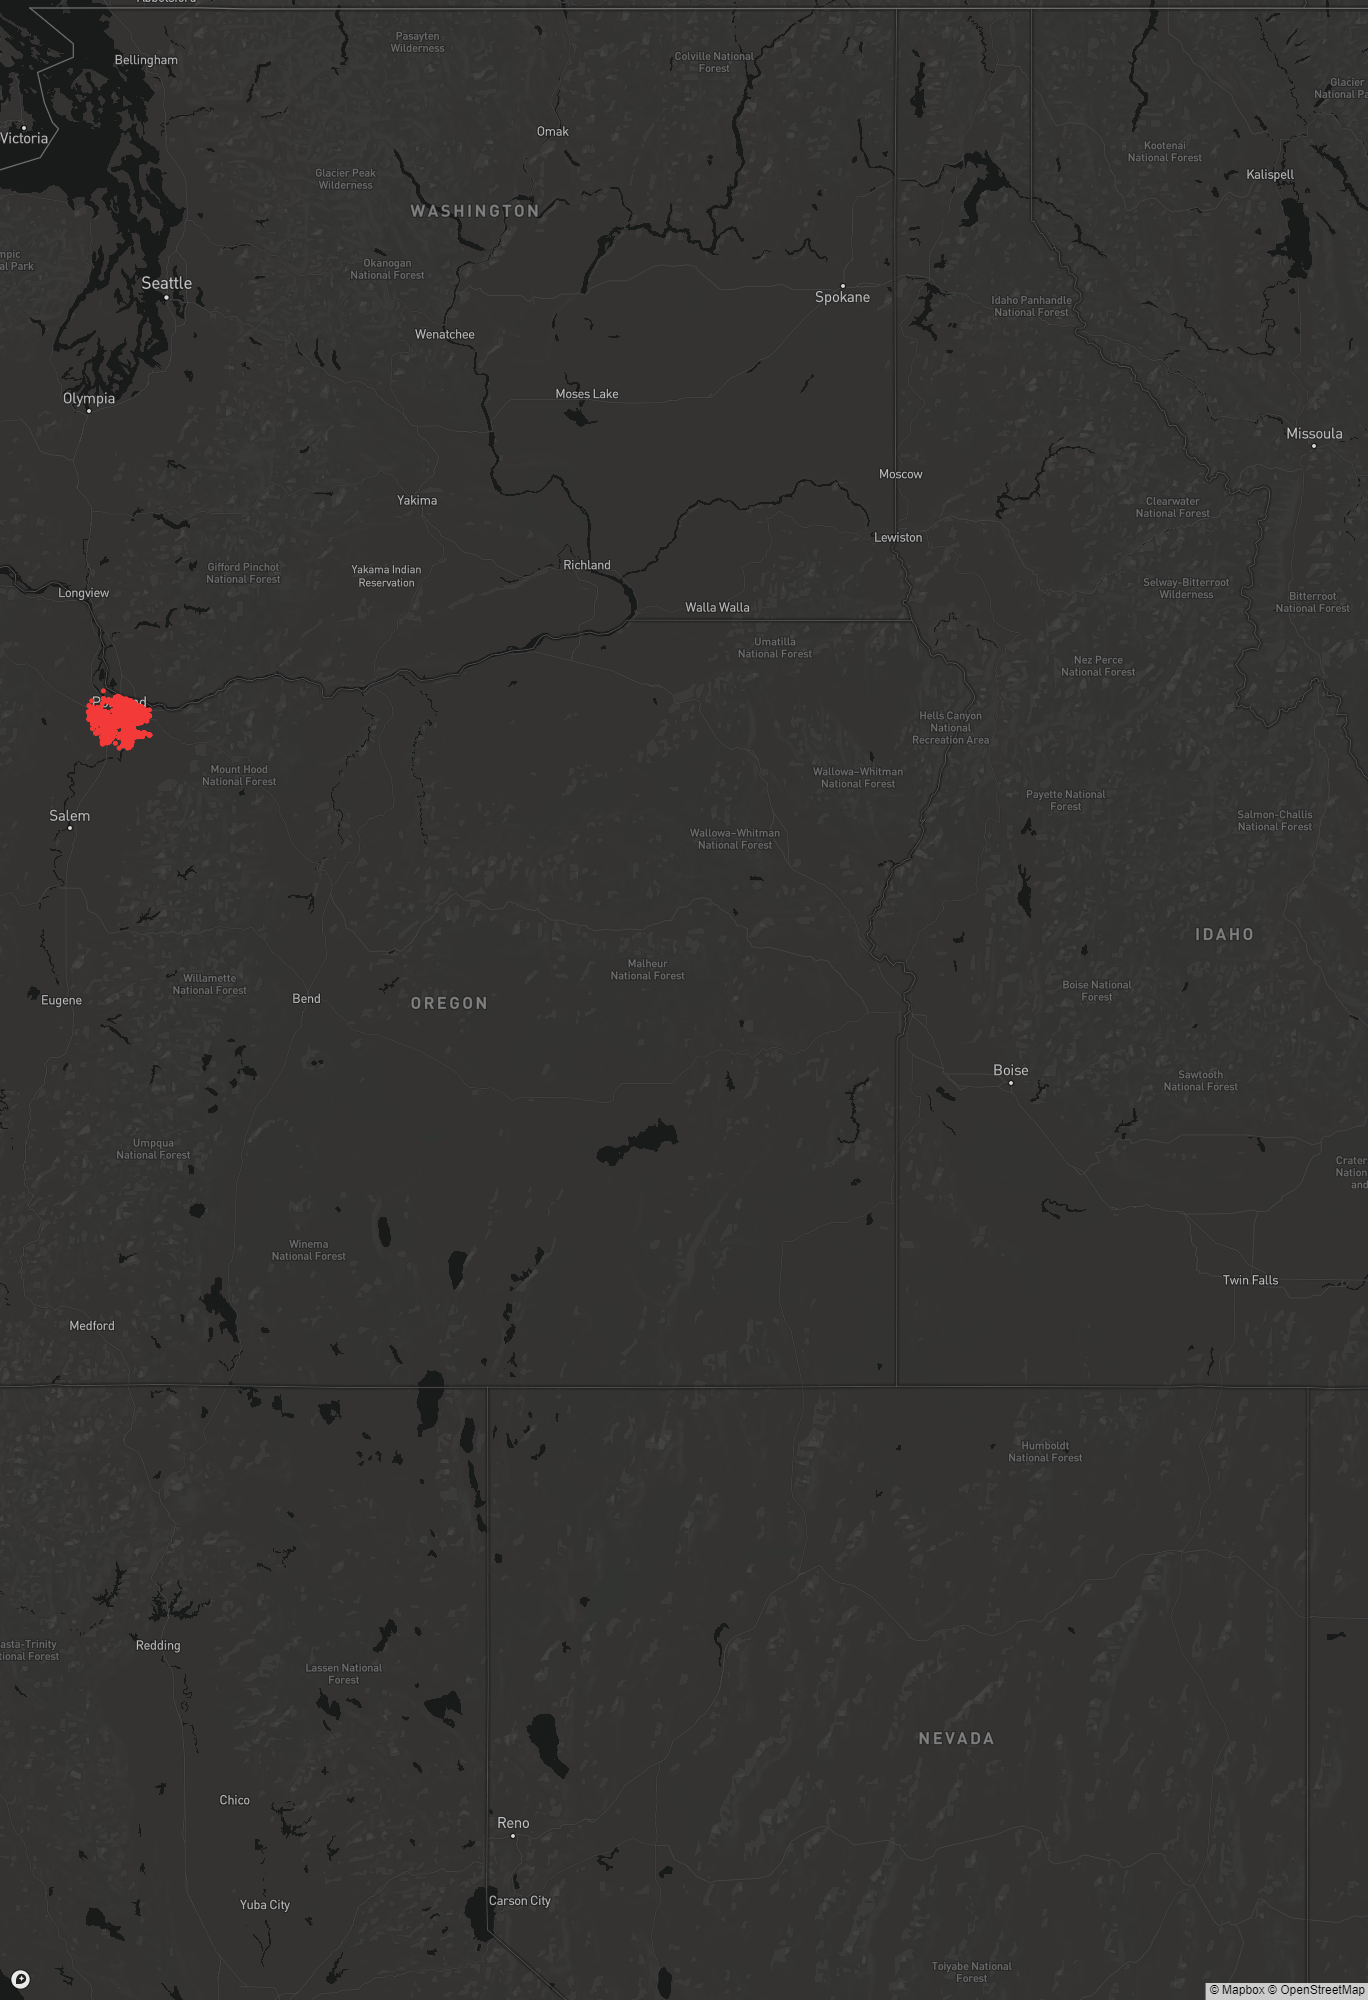

In [19]:
fig = px.scatter_mapbox(restaurants, lat="latitude", lon="longitude", hover_name="name", hover_data=["stars", "is_open"],
                        color_discrete_sequence=["#F43939"], zoom=3, height=300)
fig.update_layout(mapbox_style="dark", mapbox_accesstoken='pk.eyJ1IjoicmF5bGltOTEiLCJhIjoiY2wxMHQ5eTQ2MTRuZTNvbzM3MnB0ZDdoayJ9.1TEwS3IFZlqwn9a8rR0fBA')
fig.update_layout(height=1000,margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Restaurants Distribution
#### Distribution of restaurants in each category

In [16]:
plt.style.use('ggplot')

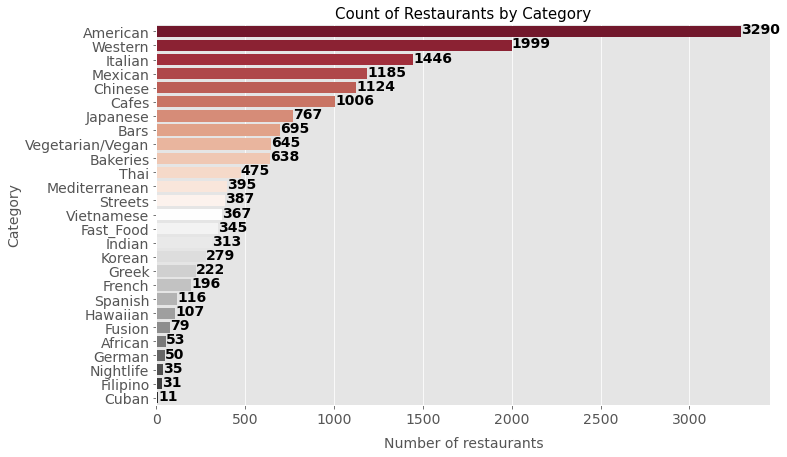

In [17]:
plt.figure(figsize=(11,7))
grouped = restaurants.category.value_counts()
sns.countplot(y='category',data=restaurants, 
              order = grouped.index, palette= sns.color_palette("RdGy", len(grouped)))
plt.xlabel('Number of restaurants', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.title('Count of Restaurants by Category', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(restaurants.category.value_counts()):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)

##  Top 10 cities with most restaurants

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


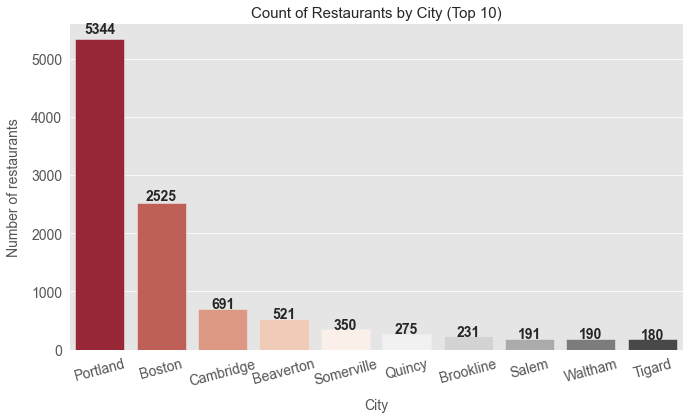

In [69]:
plt.figure(figsize=(11,6))
grouped = restaurants.city.value_counts()[:10]
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdGy", len(grouped)))
plt.ylabel('Number of restaurants', fontsize=14, labelpad=10)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.title('Count of Restaurants by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

### Reviews Distribution

#### Distribution of reviews by cuisine type

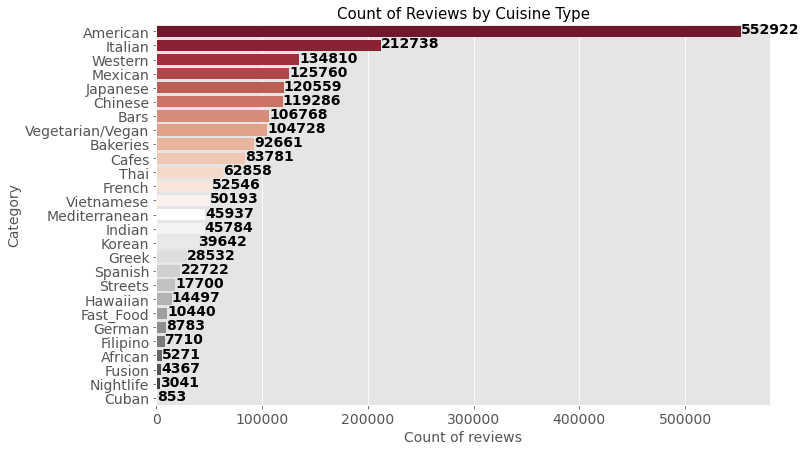

In [18]:
plt.figure(figsize=(11,7))
grouped = restaurants.groupby('category')['review_count'].sum().sort_values(ascending = False)
sns.barplot(y=grouped.index, x= grouped.values, palette= sns.color_palette("RdGy", len(grouped)) )
plt.ylabel('Category', fontsize=14)
plt.xlabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews by Cuisine Type', fontsize=15)
for i,v in enumerate(grouped):
    plt.text(v, i+0.15, str(v),fontweight='bold', fontsize=14)
plt.tick_params(labelsize=14)

## Top 10 restaurants with most reviews

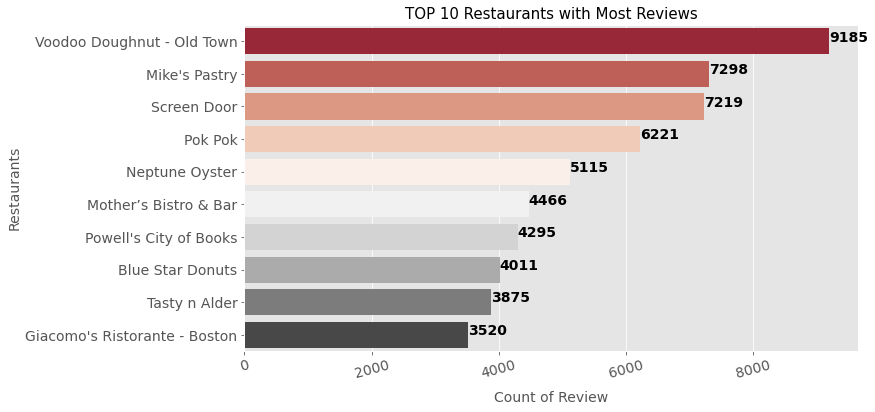

In [19]:
plt.figure(figsize=(11,6))
grouped = restaurants[['name','review_count']].sort_values(by='review_count', ascending=False)[:10]
sns.barplot(x=grouped.review_count, y = grouped.name, palette=sns.color_palette("RdGy", len(grouped)), ci=None)
plt.xlabel('Count of Review', labelpad=10, fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.title('TOP 10 Restaurants with Most Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14)

## Clean user reviews

### Convert date to datetime data type

In [8]:
# convert 'date' to datetime
user_reviews['date'] = pd.to_datetime(user_reviews['date'], format = '%Y/%m/%d')

In [9]:
# create year columns
user_reviews['year'] = user_reviews.date.dt.year

In [10]:
# sort reviews based on date
reviews_datesort = user_reviews.sort_values(by=['date'])
reviews_datesort.head()

review_id                 user_id  \
874273   7EnXf4kH6fDFwFRHVFfImg  T7sGPimU6yTg-Rl3cAk5PA   
6036940  7bg6DQfznrkC1uDTtX_piQ  6IJvrFm0X3OTy6HoDWaLpg   
5160442  YFfN28kfffNlypDeqnBEng  yYSBB5q7bY-qSVvmMgk4FA   
1704367  XgFWZiG83CryNfEE6Z0cJA  LFLpi-FfgDW4zpcdz3hfSQ   
7782100  T_XaKn0kkmroONcnAgHgxQ  TXuGgJI3_fEiUYQ355Ijwg   

                    business_id  stars  useful  funny  cool  \
874273   ZBi3FCNSGYSs9lM-5FKcbg    4.0       0      0     0   
6036940  sf04_4kcxi6UkXMUls0wGA    5.0       1      0     1   
5160442  jI4yOYZ7nZt1Yv_9GolxYg    4.0       0      0     0   
1704367  kLr68qdt6nutZCuCMz5mDg    5.0       0      0     0   
7782100  Hnx34LxtfW4XV0gZ18zMBg    5.0       0      0     0   

                                                      text  \
874273   excellent affordable moroccan food in a cosy l...   
6036940  Stylin' place with delicious niveau Italian fo...   
5160442  A bit pricey, but definitely good food.  Go up...   
1704367  One of the best and unknown places in Boston -...   
7782100  Not sure it's the Best but it's excellent. Mon...   

                       date  year  
874273  2004-10-13 00:03:20  2004  
6036940 2004-10-13 04:57:06  2004  
5160442 2004-10-14 01:02:19  2004  
1704367 2004-10-14 02:57:52  2004  
7782100 2004-10-14 06:59:03  2004

In [11]:
reviews_datesort['stars'].unique()

array([4., 5., 3., 2., 1.])

### Analysis of reviews over time



In [48]:
reviews_datesort['comment_year_month'] = reviews_datesort['date'].dt.strftime('%Y-%m')

In [49]:
reviews_group = reviews_datesort.groupby(['stars','comment_year_month']).agg(count=("stars", 'count'))
reviews_group_df = pd.DataFrame(reviews_group)

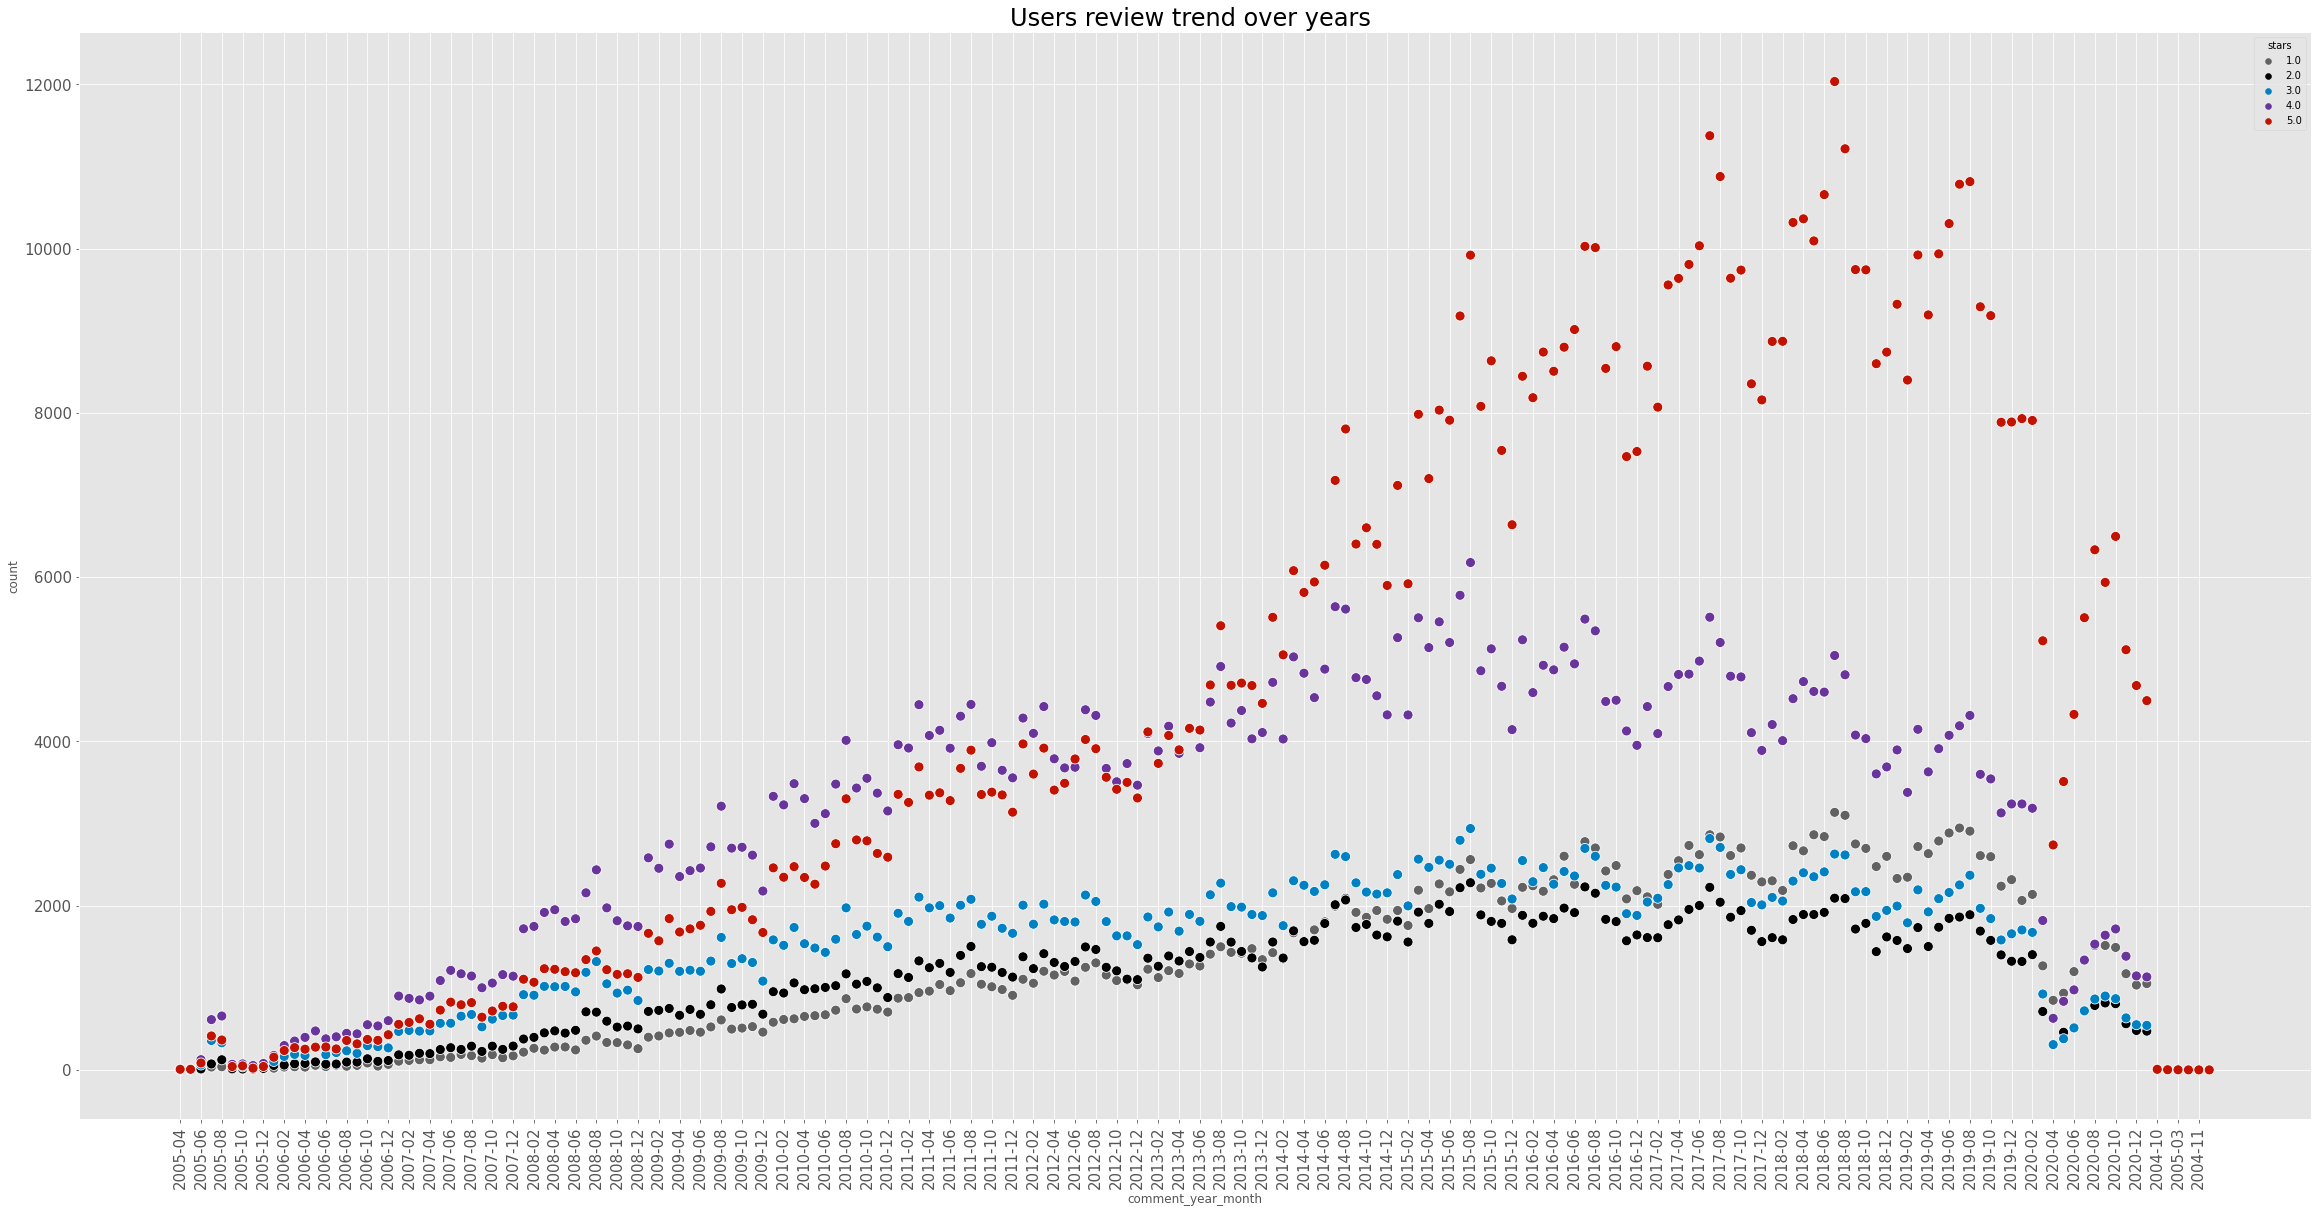

In [50]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(40, 20))
  
# drawing the plot
review_time = sns.scatterplot(x = "comment_year_month", y = "count",hue='stars', data=reviews_group_df, ax=ax, palette=['#626262', '#000000', '#0081c4',  '#69359c','#c41200'],s=100)
plt.xticks(fontsize= 15, rotation = 90)
plt.yticks(fontsize= 15)
#plt.tick_params(labelsize=20)
plt.title('Users review trend over years ',fontsize=24)
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)
plt.show()

### Analyse variable 'rating' to see if majority of the customer ratings are positive or negative.

<AxesSubplot:xlabel='stars'>

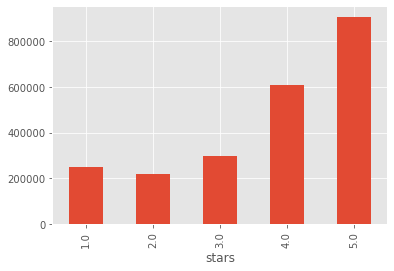

In [43]:
user_reviews.groupby('stars')['user_id'].count().plot(kind='bar')

(0.0, 6.0)

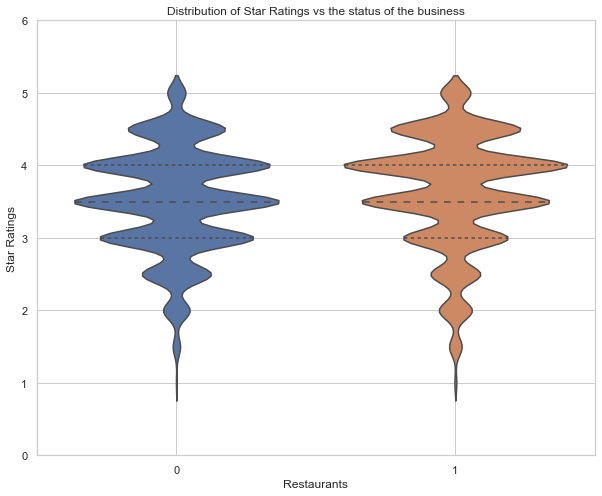

In [43]:
#violin plot for open and closed stars
sns.set(font_scale = 1)
sns.set_context({"figure.figsize": (10, 8)})
sns.set_style("whitegrid")

g = sns.violinplot(y = 'stars', x='is_open', data = restaurants,
                  split=True,inner="quart")

plt.title("Distribution of Star Ratings vs the status of the business")
plt.xlabel('Restaurants')
plt.ylabel('Star Ratings')
g.axes.grid('off')
plt.ylim(0, 6)

p-value anove

## User_reviews distribution

In [52]:
useful_reviews = len(user_reviews[user_reviews["useful"]>0])
cool_reviews = len(user_reviews[user_reviews["cool"]>0])
funny_reviews = len(user_reviews[user_reviews["funny"]>0])
negative_reviews = len(user_reviews[user_reviews["stars"]<2])
positive_reviews =len(user_reviews[user_reviews["stars"]>3])
total_reviews = len(user_reviews)

print("Total reviews: {}".format(total_reviews))
print("Useful reviews: {}".format(useful_reviews))
print("Funny reviews: {}".format(funny_reviews))
print("Cool reviews: {}".format(cool_reviews))
print("Total negative reviews: {}".format(negative_reviews))
print("Total positive reviews: {}".format(positive_reviews))

Total reviews: 2282296
Useful reviews: 938608
Funny reviews: 398450
Cool reviews: 482611
Total negative reviews: 248423
Total positive reviews: 1517610


## Top reviewed restaurants

In [53]:
top_reviewed = user_reviews[user_reviews["stars"]>3]
top_reviews_dict ={}

for business_id in top_reviewed["business_id"].values:
    try :
        top_reviews_dict[business_id] = top_reviews_dict[business_id]+1
    except:
        top_reviews_dict[business_id]=1

topbusiness = pd.DataFrame.from_dict(data= top_reviews_dict, orient="index")

topbusiness.reset_index(inplace=True)
topbusiness.columns = ['business_id', 'rated']
#del(top_reviews_dict)
#del(top_reviewed)

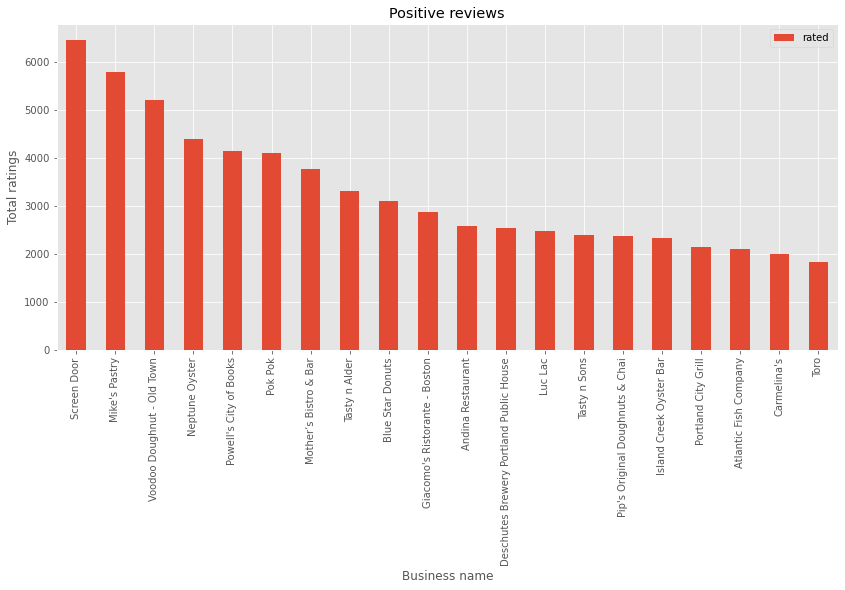

In [54]:
top_count= 20
right=pd.DataFrame(restaurants[['business_id',"name","category"]].values,
                    columns=['business_id',"Business name","category"])

top_business_data = pd.merge(topbusiness,right=right, how="inner",on='business_id')
top_business_data.sort_values("rated")[::-1][:top_count].plot(x="Business name",y="rated", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Positive reviews').set_ylabel("Total ratings")

del(topbusiness)
del(right)

### How businesses are getting reviewed over time

In [55]:
num_business = 4
business_ids = top_business_data.sort_values("rated")[::-1][:num_business].business_id.values
business_names = top_business_data.sort_values("rated")[::-1][:num_business]["Business name"].values

<ipython-input-56-49578ed8ee7d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_temp['stars_label']  = restaurant_temp['stars'].apply(lambda star: 'Positive' if star > 3 else ( 'Negative' if star < 3 else 'Neutral'))


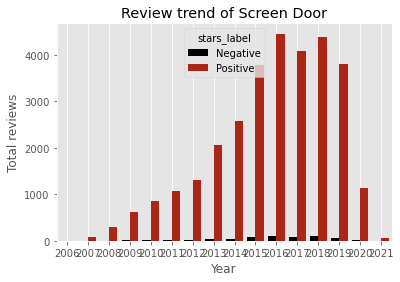

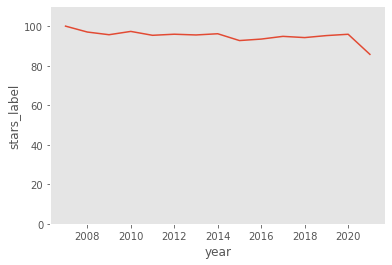

<ipython-input-56-49578ed8ee7d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_temp['stars_label']  = restaurant_temp['stars'].apply(lambda star: 'Positive' if star > 3 else ( 'Negative' if star < 3 else 'Neutral'))


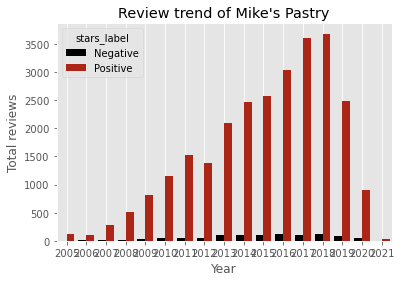

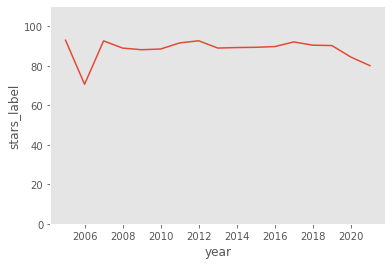

<ipython-input-56-49578ed8ee7d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_temp['stars_label']  = restaurant_temp['stars'].apply(lambda star: 'Positive' if star > 3 else ( 'Negative' if star < 3 else 'Neutral'))


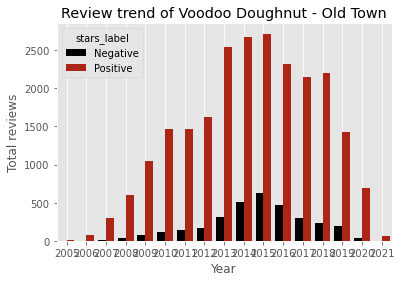

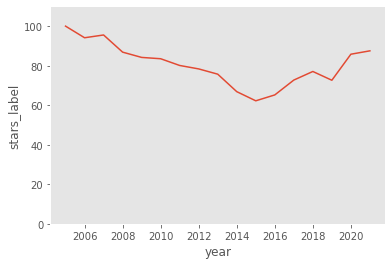

<ipython-input-56-49578ed8ee7d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_temp['stars_label']  = restaurant_temp['stars'].apply(lambda star: 'Positive' if star > 3 else ( 'Negative' if star < 3 else 'Neutral'))


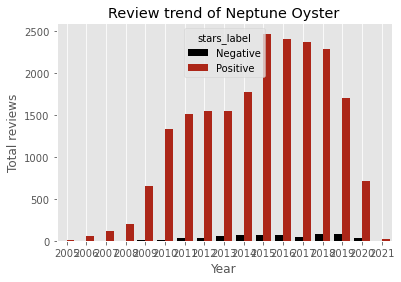

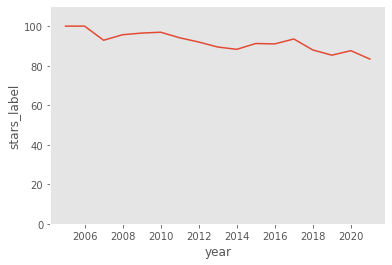

In [56]:
for i, business_id in enumerate(business_ids):
    
    # create temporary dataset by 'business_id'
    restaurant_temp =  user_reviews[user_reviews['business_id'] == business_id]
    # label positive & negative reviews
    restaurant_temp['stars_label']  = restaurant_temp['stars'].apply(lambda star: 'Positive' if star > 3 else ( 'Negative' if star < 3 else 'Neutral'))
    # drop Neutral 
    restaurant_temp =  restaurant_temp[restaurant_temp["stars_label"].str.contains("Neutral")==False]

    
    # group restaurant by stars_label, calculate the sum of stars
    restaurant_group = restaurant_temp.groupby(['stars_label','year']).agg(Total_reviews=("stars", 'sum'))
    restaurant_group = restaurant_group.reset_index()
    
    ratio = restaurant_temp.groupby("year")['stars_label'].value_counts(normalize=True).mul(100)
    ratio = pd.DataFrame(ratio)
    ratio.drop('Negative', level=1, axis=0,inplace=True)

    plt.figure()
    # plot barplot# plot barplot
    axes = sns.barplot(x="year",
           y="Total_reviews",
           hue="stars_label",
           data=restaurant_group, palette=['#000000','#c41200'])
    plt.grid()
    plt.xlabel('Year', axes=axes)
    plt.ylabel('Total reviews', axes=axes)
    plt.title('Review trend of {}'.format(business_names[i]), axes=axes)
    plt.show()
    

    plt.figure()
    ax = sns.lineplot(x = "year", y = "stars_label", data = ratio, palette=['#CCCCCC'])
    plt.grid()
    ax.set_ylim(0,110)
    plt.show()

## Most recent Trending businesses

In [400]:
top_business = 3
temp = user_reviews[["business_id",'year',"stars"]]
five_star_reviews = temp[temp["stars"]>4]
trending_business_reviews = five_star_reviews.groupby(["business_id",'year']).size().reset_index(name='counts')
trending = trending_business_reviews.sort_values(['year','counts'])[::-1][:top_business].business_id.values

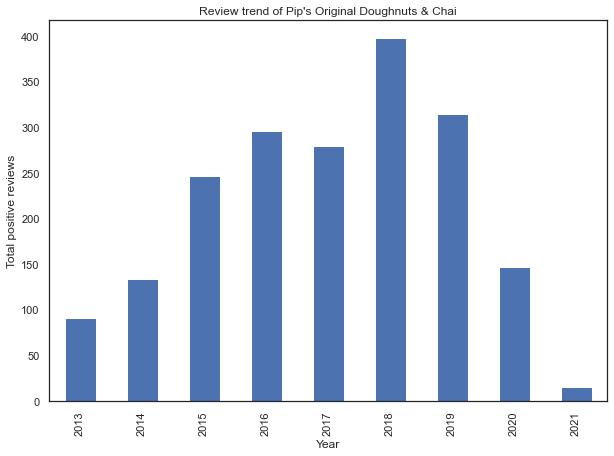

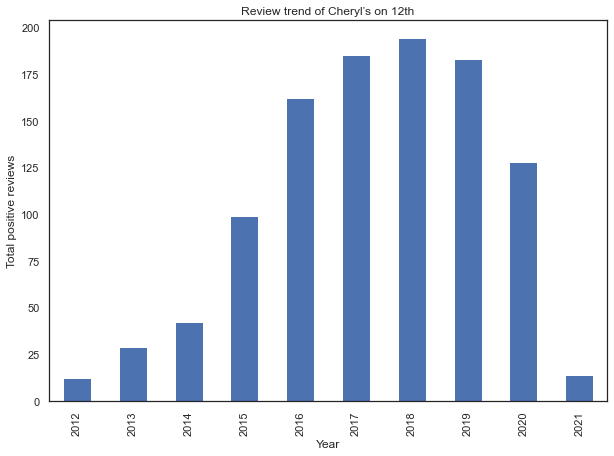

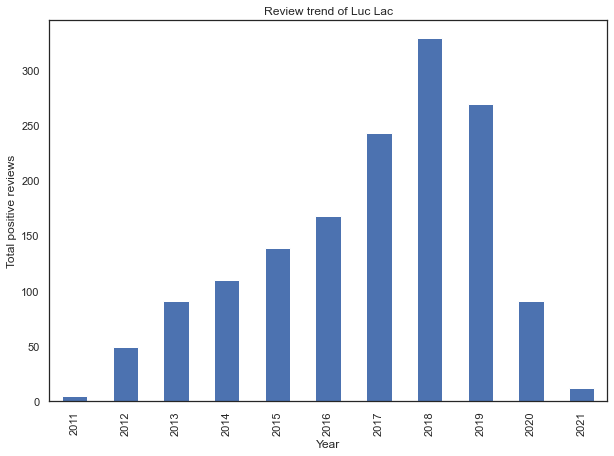

In [401]:
for  business_id in trending:
    record = trending_business_reviews.loc[trending_business_reviews['business_id'] == business_id]
    business_name = restaurants.loc[restaurants['business_id'] == business_id].name.values[0]
    series = pd.Series(record["counts"].values, index=record.year.values, name='Trending business')
    axes = series.plot(kind="bar",figsize=(10, 7))
    plt.xlabel('Year', axes=axes)
    plt.ylabel('Total positive reviews', axes=axes)
    plt.title('Review trend of {}'.format(business_name), axes=axes)
    plt.show()
    #len(trending_business_reviews)

## Negatively reviewed businesses¶

In [21]:
bottom_reviewed = user_reviews[user_reviews["stars"]<=1]
bottom_reviews_dict ={} 

for business_id in bottom_reviewed["business_id"].values:
    try :
        bottom_reviews_dict[business_id] =bottom_reviews_dict[business_id]+1
    except:
        bottom_reviews_dict[business_id]=1
        
bottombusiness = pd.DataFrame.from_dict(data= bottom_reviews_dict,orient="index")

bottombusiness.reset_index(inplace=True)
#bottombusiness.head()
bottombusiness.columns = ['business_id', 'rated']

Text(0, 0.5, 'Total 1 star ratings')

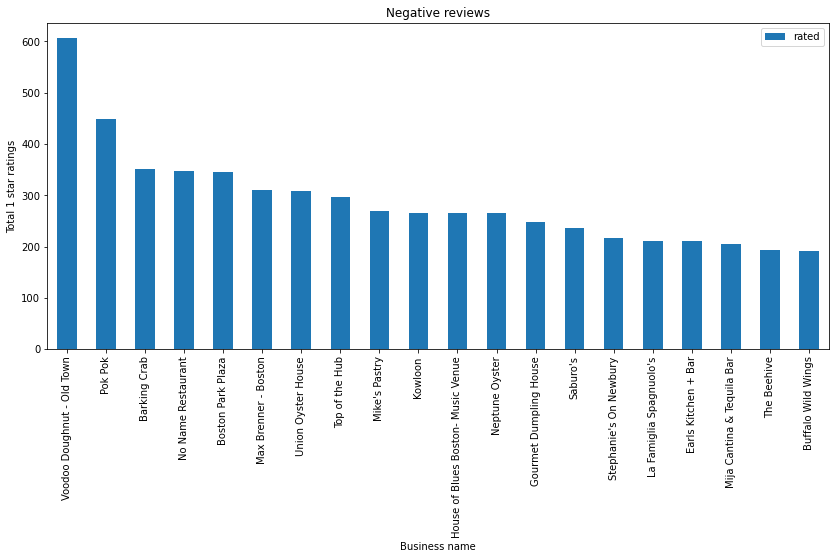

In [22]:
top_count= 20
right=pd.DataFrame(restaurants[['business_id',"name","category"]].values,
                    columns=['business_id',"Business name","category"])

bottom_business_data = pd.merge(bottombusiness,right=right, how="inner",on='business_id')
bottom_business_data.sort_values("rated")[::-1][:top_count].plot(x="Business name",y="rated", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Negative reviews').set_ylabel("Total 1 star ratings")

#del(bottom_reviewed)
#del(bottom_reviews_dict)
#del(bottombusiness)
#del(right)

In [25]:
num_business = 7
business_ids = bottom_business_data.sort_values("rated")[::-1][:num_business].business_id.values
business_names = bottom_business_data.sort_values("rated")[::-1][:num_business]["Business name"].values

<ipython-input-26-3f031203922d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



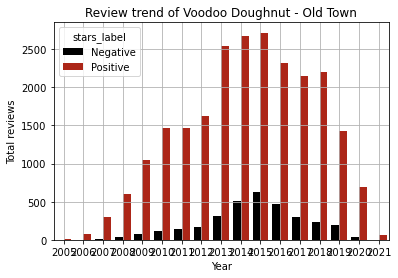

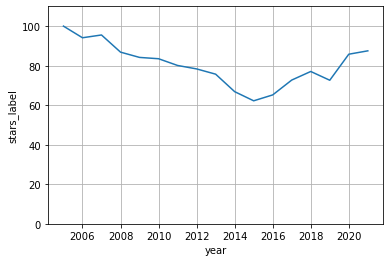

<ipython-input-26-3f031203922d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



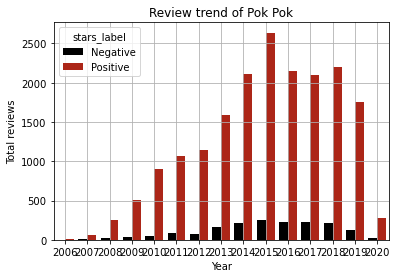

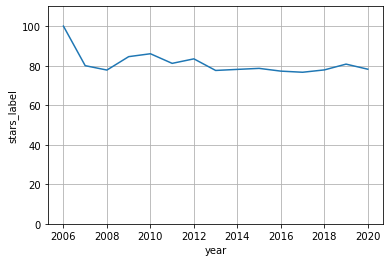

<ipython-input-26-3f031203922d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



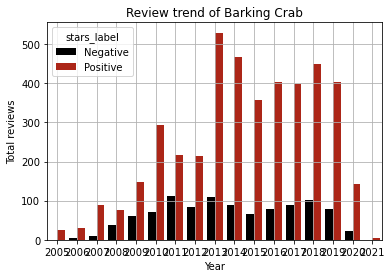

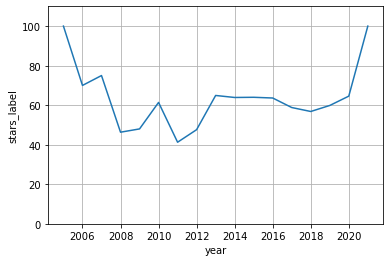

<ipython-input-26-3f031203922d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



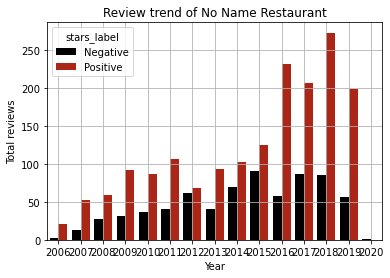

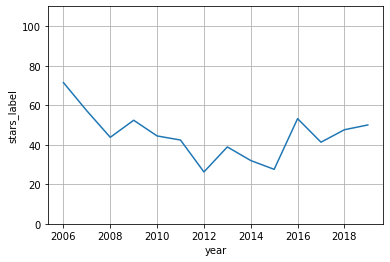

<ipython-input-26-3f031203922d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



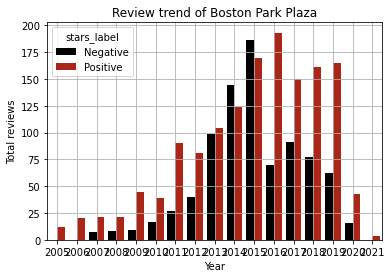

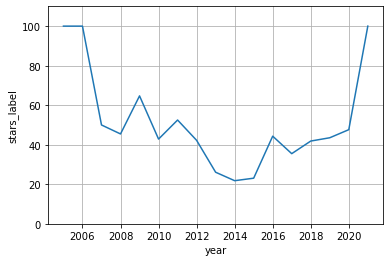

<ipython-input-26-3f031203922d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



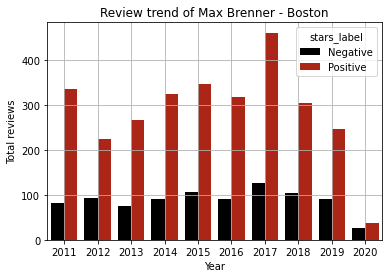

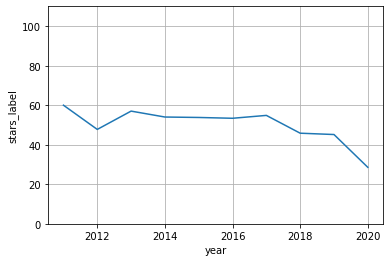

<ipython-input-26-3f031203922d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



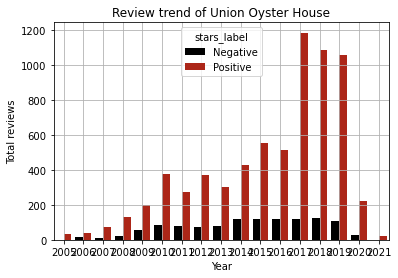

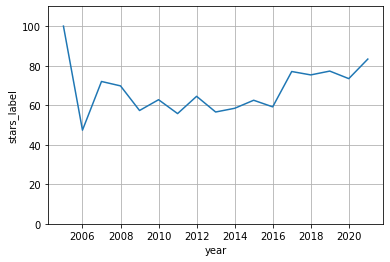

In [26]:
for i, business_id in enumerate(business_ids):
    
    # create temporary dataset by 'business_id'
    restaurant_temp =  user_reviews[user_reviews['business_id'] == business_id]
    # label positive & negative reviews
    restaurant_temp['stars_label']  = restaurant_temp['stars'].apply(lambda star: 'Positive' if star > 3 else ( 'Negative' if star < 3 else 'Neutral'))
    # drop Neutral 
    restaurant_temp =  restaurant_temp[restaurant_temp["stars_label"].str.contains("Neutral")==False]

    
    # group restaurant by stars_label, calculate the sum of stars
    restaurant_group = restaurant_temp.groupby(['stars_label','year']).agg(Total_reviews=("stars", 'sum'))
    restaurant_group = restaurant_group.reset_index()
    
    ratio = restaurant_temp.groupby("year")['stars_label'].value_counts(normalize=True).mul(100)
    ratio = pd.DataFrame(ratio)
    ratio.drop('Negative', level=1, axis=0,inplace=True)
    
    plt.figure()
    # plot barplot# plot barplot
    axes = sns.barplot(x="year",
           y="Total_reviews",
           hue="stars_label",
           data=restaurant_group, palette=['#000000','#c41200'])
    plt.grid()
    plt.xlabel('Year', axes=axes)
    plt.ylabel('Total reviews', axes=axes)
    plt.title('Review trend of {}'.format(business_names[i]), axes=axes)
    plt.show()
    
    plt.figure()
    ax = sns.lineplot(x = "year", y = "stars_label", data = ratio,  palette=['#CCCCCC'])
    plt.grid()
    ax.set_ylim(0,110)
    plt.show()

## Restaurant Chains & geography

Conduct additional feature engineering to improve the model.
Is the business part of a chain.

In [82]:
restaurants.head()

business_id                           name              address  \
0  tCbdrRPZA0oiIYSmHG3J0w        Flying Elephants at PDX  7000 NE Airport Way   
1  HPA_qyMEddpAEtFof02ixg            Mr G's Pizza & Subs        474 Lowell St   
2  jGennaZUr2MsJyRhijNBfA                Legal Sea Foods      1 Harborside Dr   
3  iPD8BBvea6YldQZPHzVrSQ                Espresso Minute         334 Mass Ave   
4  jx91IMdGOmLOo8h_F9z39g  Cleary's Restaurant & Spirits   12429 NE Glisan St   

       city state postal_code   latitude   longitude  stars  review_count  \
0  Portland    OR       97218  45.588906 -122.593331    4.0           126   
1   Peabody    MA       01960  42.541155  -70.973438    4.0            39   
2    Boston    MA       02128  42.363442  -71.025781    3.5           856   
3    Boston    MA       02115  42.342673  -71.084239    4.5             7   
4  Portland    OR       97230  45.526473 -122.535323    3.5            19   

   ...    lot street  valet validated RestaurantsAttire NoiseLevel  WiFi  \
0  ...  False  False  False     False            casual          2  True   
1  ...   True  False  False     False            casual          2  True   
2  ...  False  False  False     False            casual          2  True   
3  ...  False  False  False     False            casual          1   NaN   
4  ...   True  False  False     False            casual          2   NaN   

         Alcohol chain sentiment_final  
0  beer_and_wine     0        0.366400  
1            NaN     0        0.132592  
2       full_bar     1        0.090394  
3            NaN     0        0.655234  
4       full_bar     0       -0.114162  

[5 rows x 43 columns]

In [59]:
#get all names that are lower and duplicated
name_lower = restaurants['name'].str.lower().copy()

In [60]:
name_val_count = name_lower.value_counts(sort=True, ascending=False)

In [61]:
#see very very popular chains
name_val_count[:30]

subway                           174
mcdonald's                       138
dunkin'                           86
burger king                       70
domino's pizza                    70
starbucks                         68
taco bell                         56
chipotle mexican grill            55
wendy's                           46
papa gino's pizzeria              39
panera bread                      34
pizza hut                         33
papa murphy's                     31
kfc                               28
panda express                     26
five guys                         26
au bon pain                       24
99 restaurants                    22
b.good                            21
bertucci's italian restaurant     19
qdoba mexican eats                19
burgerville                       18
jimmy john's                      18
papa john's pizza                 17
jack in the box                   16
sweetgreen                        16
carl's jr                         15
c

In [62]:
#see even less popular chains
name_val_count[(name_val_count.values==3)]

whole heart provisions    3
jim & patty's coffee      3
pollo royal               3
hawaiian time             3
tealuxe                   3
                         ..
fiorella's express        3
best teriyaki             3
fire on the mountain      3
hong kong cafe            3
mexicali cantina grill    3
Name: name, Length: 182, dtype: int64

In [63]:
# Let chain be restaurants that has at least 5 identical entries

#get chain names
chain_names = name_val_count[(name_val_count.values>=5)].index.tolist()
#see samples
chain_names[:10]

['subway',
 "mcdonald's",
 "dunkin'",
 'burger king',
 "domino's pizza",
 'starbucks',
 'taco bell',
 'chipotle mexican grill',
 "wendy's",
 "papa gino's pizzeria"]

In [64]:
#distribution among target value
restaurants.groupby(by='is_open', as_index=True).mean()[['chain']]

chain
is_open          
0        0.080099
1        0.167433

In [65]:
chain_restaurant = name_val_count[(name_val_count.values>=5)]
chain_restaurant = pd.DataFrame(chain_restaurant)

In [66]:
chain_restaurant.rename(columns={"name": "Count"})

Count
subway                     174
mcdonald's                 138
dunkin'                     86
burger king                 70
domino's pizza              70
...                        ...
cava                         5
rosie's bakery               5
stash's pizza                5
andrea's house of pizza      5
gourmet india                5

[154 rows x 1 columns]

In [67]:
type(chain_restaurant)

pandas.core.frame.DataFrame

In [68]:
chain_restaurant.reset_index(inplace=True)
chain_restaurant = chain_restaurant.rename(columns = {'index':'restaurants','name':'count'})

In [69]:
chain_restaurant

restaurants  count
0                     subway    174
1                 mcdonald's    138
2                    dunkin'     86
3                burger king     70
4             domino's pizza     70
..                       ...    ...
149                     cava      5
150           rosie's bakery      5
151            stash's pizza      5
152  andrea's house of pizza      5
153            gourmet india      5

[154 rows x 2 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'subway'),
  Text(1, 0, "mcdonald's"),
  Text(2, 0, "dunkin'"),
  Text(3, 0, 'burger king'),
  Text(4, 0, "domino's pizza"),
  Text(5, 0, 'starbucks'),
  Text(6, 0, 'taco bell'),
  Text(7, 0, 'chipotle mexican grill'),
  Text(8, 0, "wendy's"),
  Text(9, 0, "papa gino's pizzeria"),
  Text(10, 0, 'panera bread'),
  Text(11, 0, 'pizza hut'),
  Text(12, 0, "papa murphy's"),
  Text(13, 0, 'kfc'),
  Text(14, 0, 'panda express')])

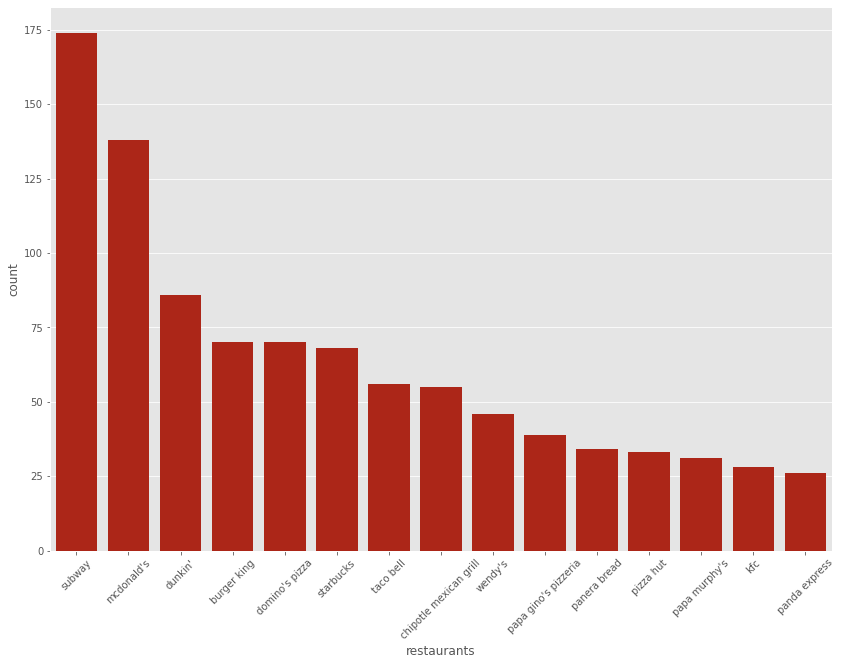

In [75]:
# Set the figure size
plt.figure(figsize=(14, 10))

# plot a bar chart
chain_bar = sns.barplot(
    x='restaurants',
    y='count', 
    data=chain_restaurant.head(15),
    estimator=sum, 
    ci=None, 
    color='#c41200')
plt.xticks(fontsize= 10, rotation = 45)


In [64]:
restaurants[(restaurants['is_open']== 1) &(restaurants['chain']== 0)].shape

(8150, 43)

In [20]:
df_1 = restaurants.loc[:, ["is_open", "chain"]]

In [21]:
df_1

is_open  chain
0            1      0
1            1      0
2            1      1
3            0      0
4            1      0
...        ...    ...
16251        1      0
16252        1      0
16253        0      0
16254        0      0
16255        1      0

[16256 rows x 2 columns]

In [26]:
groupby = df_1.groupby("chain", axis=0)
groupby_df = groupby.mean()

In [30]:
groupby_df.reset_index(inplace=True)
groupby_df = groupby_df.rename(columns = {'index':'chain','name':'is_open'})


In [93]:
groupby_df

chain   is_open
0      0  0.578055
1      1  0.759852

## Plot chain vs non chain restaurants `is_open` rate

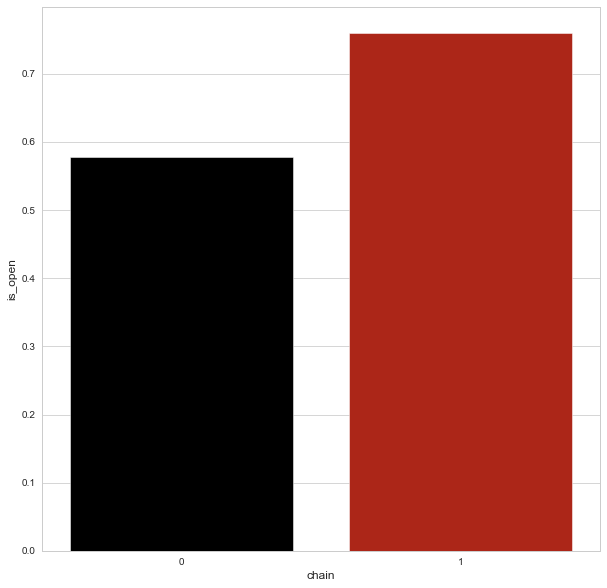

In [92]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x='chain' , y='is_open', data= groupby_df, palette=['#000000','#c41200'])

## EDA of restaurants ['categories']

### Top 10 categories of closed restaurants

In [86]:
#business_overall = restaurants.assign(categories = restaurants.categories.str.split(', ')).explode('categories')
cat = restaurants[restaurants['is_open'] == 0].category.value_counts()
cat = cat.to_frame().reset_index()
cat.columns = ['category', 'Count']

In [87]:
cat= cat.sort_values(by = 'Count', ascending = False)

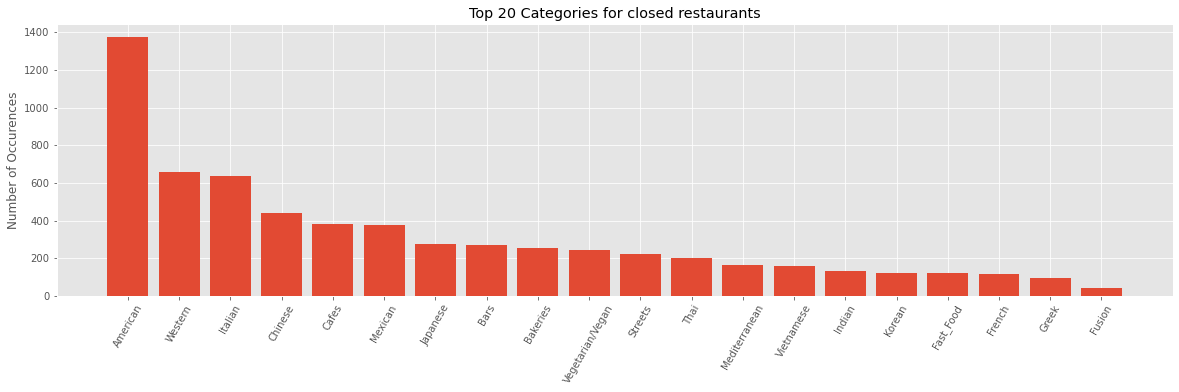

In [88]:
cat = cat[0:20]
objects = list(cat.category)
y_pos = np.arange(len(objects))
Numbers = list(cat.Count)

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects, rotation=60)
plt.ylabel('Number of Occurences')
plt.title('Top 20 Categories for closed restaurants')

plt.show()

### Create dummy variables for categorical variables.

In [31]:
categorical_cols = restaurants.select_dtypes(include=['object'])
categorical_cols.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'category', 'RestaurantsTakeOut', 'GoodForKids', 'BikeParking',
       'OutdoorSeating', 'Caters', 'RestaurantsReservations',
       'RestaurantsDelivery', 'HasTV', 'RestaurantsGoodForGroups',
       'BusinessAcceptsCreditCards', 'casual', 'classy', 'divey', 'hipster',
       'intimate', 'romantic', 'touristy', 'trendy', 'upscale', 'garage',
       'lot', 'street', 'valet', 'validated', 'RestaurantsAttire', 'WiFi',
       'Alcohol'],
      dtype='object')

In [36]:
cols_drop = ['business_id','name','address', 'postal_code']

In [37]:
categorical_cols.drop(columns= cols_drop, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
categorical_cols

city state          category RestaurantsTakeOut GoodForKids  \
0         Portland    OR  Vegetarian/Vegan               True        True   
1          Peabody    MA           Western               True        True   
2           Boston    MA           Italian               True        True   
3           Boston    MA             Cafes               True        True   
4         Portland    OR         Nightlife               True        True   
...            ...   ...               ...                ...         ...   
16251  Lake Oswego    OR          American               True        True   
16252      Chelsea    MA           Italian               True        True   
16253       Quincy    MA          American               True       False   
16254       Tigard    OR          American              False       False   
16255     Portland    OR             Cafes               True         NaN   

      BikeParking OutdoorSeating Caters RestaurantsReservations  \
0           False          False   True                   False   
1            True           True   True                   False   
2           False          False  False                   False   
3            True           True   True                   False   
4            True          False    NaN                   False   
...           ...            ...    ...                     ...   
16251        True           True   True                   False   
16252       False           True  False                   False   
16253         NaN          False    NaN                    True   
16254         NaN           True  False                    True   
16255         NaN            NaN    NaN                     NaN   

      RestaurantsDelivery  ... trendy upscale garage    lot street  valet  \
0                   False  ...  False   False   True  False  False  False   
1                    True  ...  False   False  False   True  False  False   
2                   False  ...  False   False   True  False  False  False   
3                   False  ...  False   False  False  False  False  False   
4                   False  ...  False   False  False   True  False  False   
...                   ...  ...    ...     ...    ...    ...    ...    ...   
16251                True  ...  False   False  False   True   True  False   
16252               False  ...  False   False  False   True  False  False   
16253               False  ...    NaN     NaN  False  False   True  False   
16254               False  ...  False   False   True  False  False   True   
16255                True  ...    NaN     NaN    NaN    NaN    NaN    NaN   

      validated RestaurantsAttire  WiFi        Alcohol  
0         False            casual  True  beer_and_wine  
1         False            casual  True            NaN  
2         False            casual  True       full_bar  
3         False            casual   NaN            NaN  
4         False            casual   NaN       full_bar  
...         ...               ...   ...            ...  
16251     False            casual  True  beer_and_wine  
16252     False            casual   NaN  beer_and_wine  
16253     False            casual   NaN       full_bar  
16254     False            casual   NaN       full_bar  
16255       NaN               NaN   NaN            NaN  

[16256 rows x 30 columns]

In [41]:
categorical_cols_to_drop = list(categorical_cols.columns)

categorical_cols = restaurants[['RestaurantsTakeOut',
       'OutdoorSeating', 'RestaurantsReservations', 'RestaurantsDelivery',
       'BusinessAcceptsCreditCards', 'garage', 'lot',
       'street', 'valet', 'validated']]

In [39]:
# Create dummy variables 
dum_df = pd.get_dummies(categorical_cols,drop_first=True)
dum_df

city_Aloha  city_Andover  city_Arlington  city_Auburndale  city_Avon  \
0               0             0               0                0          0   
1               0             0               0                0          0   
2               0             0               0                0          0   
3               0             0               0                0          0   
4               0             0               0                0          0   
...           ...           ...             ...              ...        ...   
16251           0             0               0                0          0   
16252           0             0               0                0          0   
16253           0             0               0                0          0   
16254           0             0               0                0          0   
16255           0             0               0                0          0   

       city_Back Bay  city_Beaverton  city_Bedford  city_Belmont  \
0                  0               0             0             0   
1                  0               0             0             0   
2                  0               0             0             0   
3                  0               0             0             0   
4                  0               0             0             0   
...              ...             ...           ...           ...   
16251              0               0             0             0   
16252              0               0             0             0   
16253              0               0             0             0   
16254              0               0             0             0   
16255              0               0             0             0   

       city_Beverly  ...  garage_True  lot_True  street_True  valet_True  \
0                 0  ...            1         0            0           0   
1                 0  ...            0         1            0           0   
2                 0  ...            1         0            0           0   
3                 0  ...            0         0            0           0   
4                 0  ...            0         1            0           0   
...             ...  ...          ...       ...          ...         ...   
16251             0  ...            0         1            1           0   
16252             0  ...            0         1            0           0   
16253             0  ...            0         0            1           0   
16254             0  ...            1         0            0           1   
16255             0  ...            0         0            0           0   

       validated_True  RestaurantsAttire_dressy  RestaurantsAttire_formal  \
0                   0                         0                         0   
1                   0                         0                         0   
2                   0                         0                         0   
3                   0                         0                         0   
4                   0                         0                         0   
...               ...                       ...                       ...   
16251               0                         0                         0   
16252               0                         0                         0   
16253               0                         0                         0   
16254               0                         0                         0   
16255               0                         0                         0   

       WiFi_None  Alcohol_beer_and_wine  Alcohol_full_bar  
0              0                      1                 0  
1              0                      0                 0  
2              0                      0                 1  
3              0                      0                 0  
4              0                      0                 1  
...          ...                    ...    

restaurants_cleaned = restaurants_attr_sent.drop(columns = ['RestaurantsTakeOut',
       'OutdoorSeating', 'RestaurantsReservations', 'RestaurantsDelivery',
       'BusinessAcceptsCreditCards', 'garage', 'lot',
       'street', 'valet', 'validated'], axis = 1)

In [44]:
restaurants_cleaned = pd.concat([restaurants, dum_df], axis=1 , join ='inner')
restaurants_cleaned.head()

business_id                           name              address  \
0  tCbdrRPZA0oiIYSmHG3J0w        Flying Elephants at PDX  7000 NE Airport Way   
1  HPA_qyMEddpAEtFof02ixg            Mr G's Pizza & Subs        474 Lowell St   
2  jGennaZUr2MsJyRhijNBfA                Legal Sea Foods      1 Harborside Dr   
3  iPD8BBvea6YldQZPHzVrSQ                Espresso Minute         334 Mass Ave   
4  jx91IMdGOmLOo8h_F9z39g  Cleary's Restaurant & Spirits   12429 NE Glisan St   

       city state postal_code   latitude   longitude  stars  review_count  \
0  Portland    OR       97218  45.588906 -122.593331    4.0           126   
1   Peabody    MA       01960  42.541155  -70.973438    4.0            39   
2    Boston    MA       02128  42.363442  -71.025781    3.5           856   
3    Boston    MA       02115  42.342673  -71.084239    4.5             7   
4  Portland    OR       97230  45.526473 -122.535323    3.5            19   

   ...  garage_True lot_True street_True valet_True validated_True  \
0  ...            1        0           0          0              0   
1  ...            0        1           0          0              0   
2  ...            1        0           0          0              0   
3  ...            0        0           0          0              0   
4  ...            0        1           0          0              0   

  RestaurantsAttire_dressy RestaurantsAttire_formal WiFi_None  \
0                        0                        0         0   
1                        0                        0         0   
2                        0                        0         0   
3                        0                        0         0   
4                        0                        0         0   

  Alcohol_beer_and_wine Alcohol_full_bar  
0                     1                0  
1                     0                0  
2                     0                1  
3                     0                0  
4                     0                1  

[5 rows x 261 columns]

In [46]:
restaurants_cleaned.drop(columns=categorical_cols_to_drop,inplace=True)

## Plot Features' Heat Map

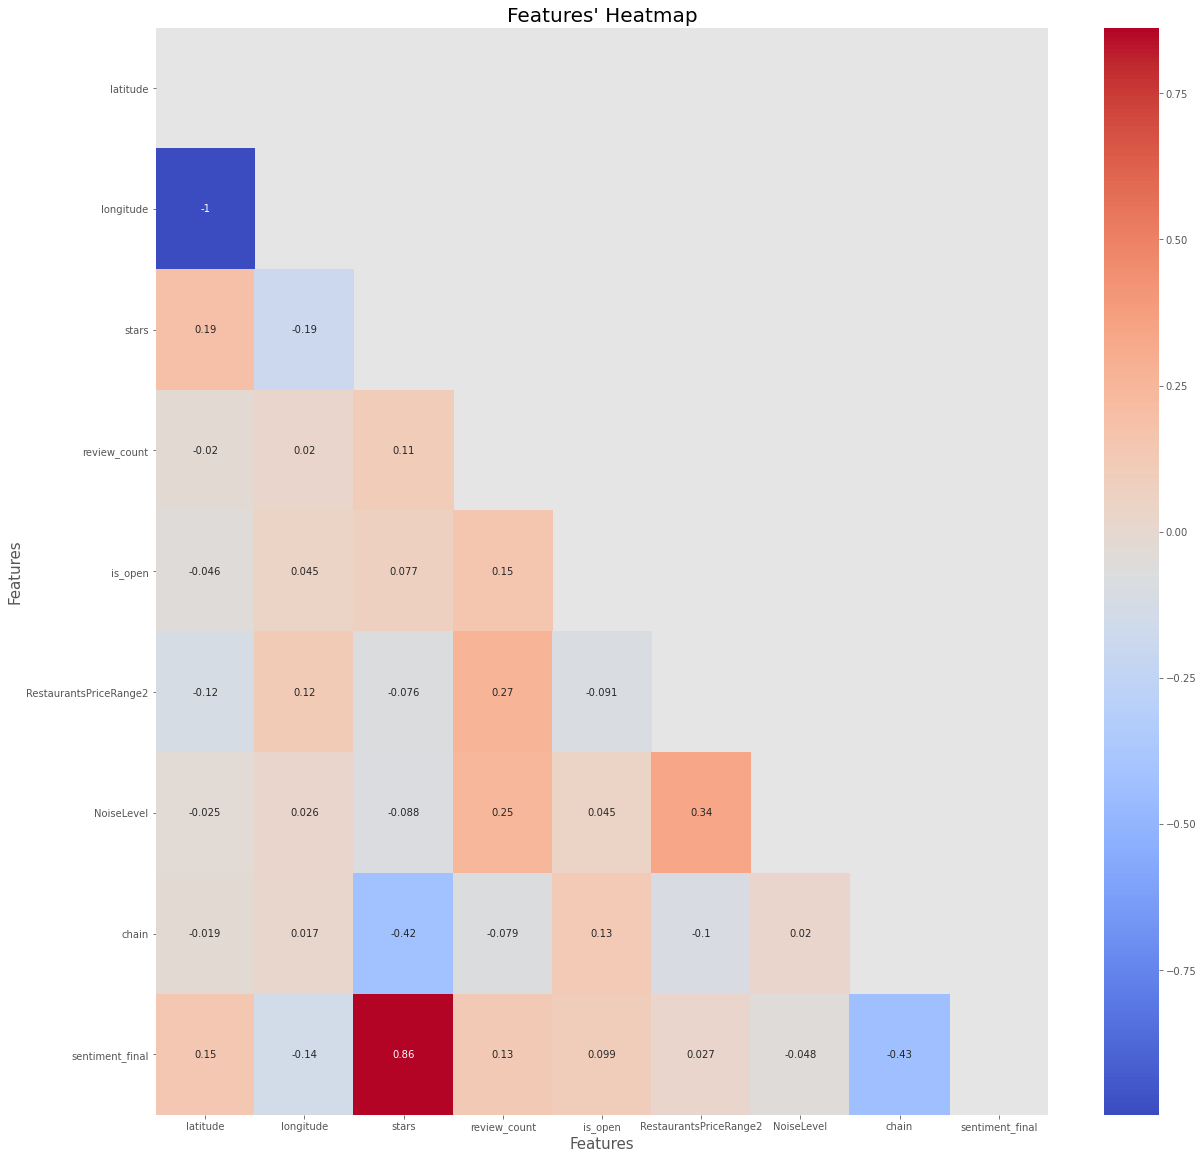

In [81]:
plt.figure(figsize=(20,20))
corr = restaurants.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot = True, cmap='coolwarm')
plt.title('Features\' Heatmap', fontsize=20)
plt.xlabel('Features',fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.show()

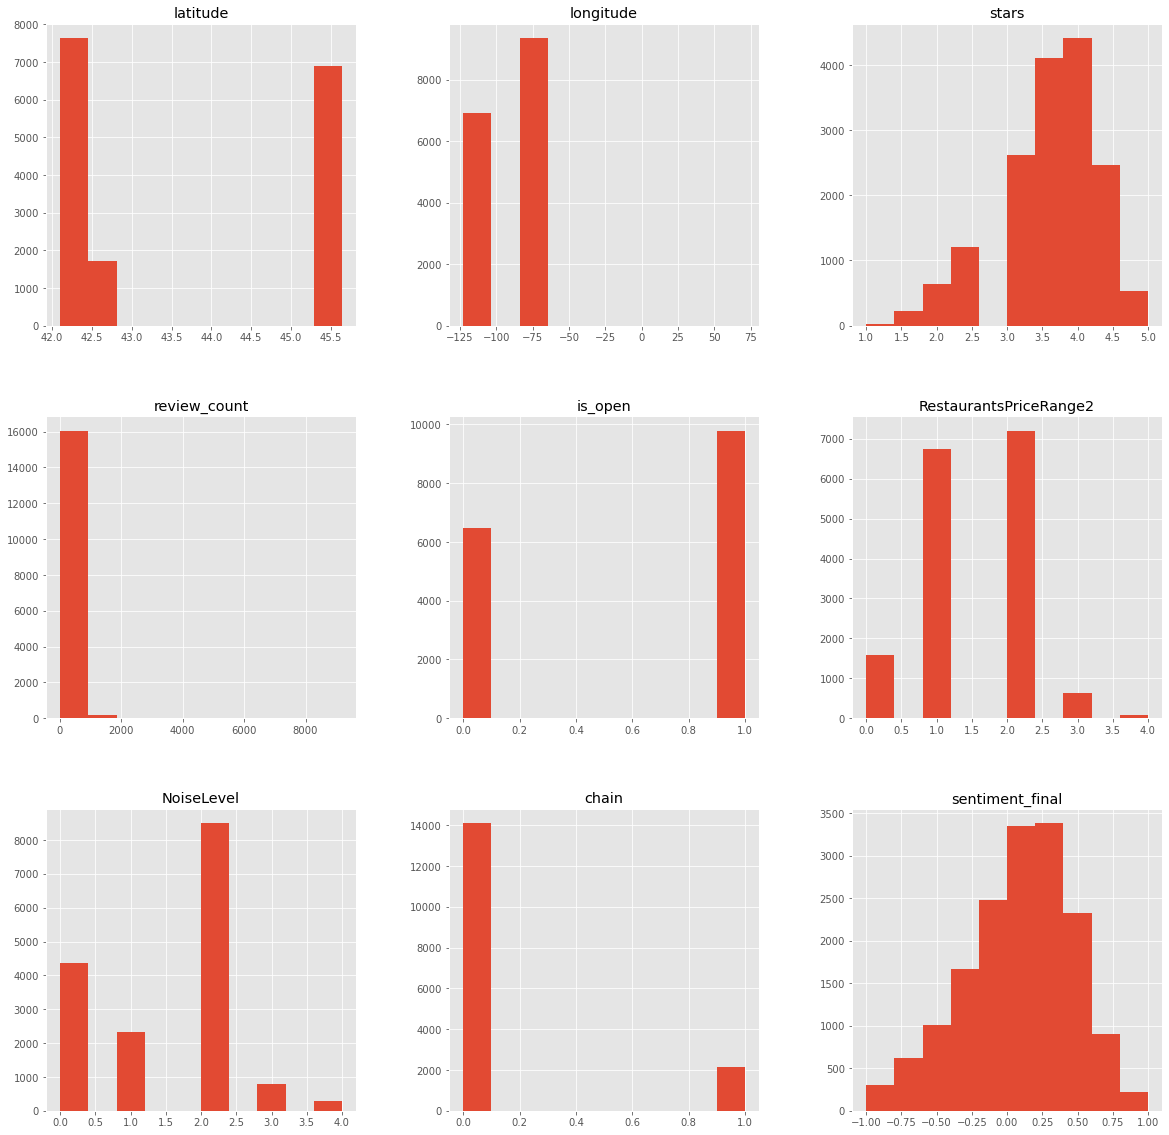

In [79]:
restaurants.hist(figsize=(20, 20));

### Price Range

latitude                                             \
                          count       mean       std        min        25%   
RestaurantsPriceRange2                                                       
0                        1591.0  43.834551  1.570568  42.108328  42.354834   
1                        6746.0  43.880064  1.568972  42.100171  42.356907   
2                        7206.0  43.568626  1.526246  42.100998  42.351045   
3                         627.0  43.000930  1.263214  42.106303  42.348569   
4                          86.0  43.167838  1.389660  42.168649  42.349529   

                                                        longitude             \
                              50%        75%        max     count       mean   
RestaurantsPriceRange2                                                         
0                       42.541197  45.512837  45.604555    1591.0 -95.201350   
1                       42.556150  45.514824  45.642123    6746.0 -95.929528   
2                       42.452879  45.503523  45.613887    7206.0 -90.829057   
3                       42.363402  42.511965  45.601008     627.0 -81.454470   
4                       42.357540  44.752492  45.572100      86.0 -84.274444   

                        ... chain      sentiment_final                      \
                        ...   75%  max           count      mean       std   
RestaurantsPriceRange2  ...                                                  
0                       ...   0.0  1.0          1591.0  0.279332  0.419132   
1                       ...   0.0  1.0          6746.0 -0.008511  0.408661   
2                       ...   0.0  1.0          7206.0  0.115628  0.325354   
3                       ...   0.0  1.0           627.0  0.217816  0.285072   
4                       ...   0.0  1.0            86.0  0.253443  0.360059   

                                                                          
                             min       25%       50%       75%       max  
RestaurantsPriceRange2                                                    
0                      -0.999254  0.020491  0.337497  0.594246  0.999456  
1                      -0.998787 -0.286486  0.032803  0.291099  0.998519  
2                      -0.998574 -0.094527  0.148264  0.348160  0.995522  
3                      -0.911749  0.053367  0.257106  0.413486  0.953665  
4                      -0.996532  0.108809  0.337096  0.469048  0.821981  

[5 rows x 64 columns]

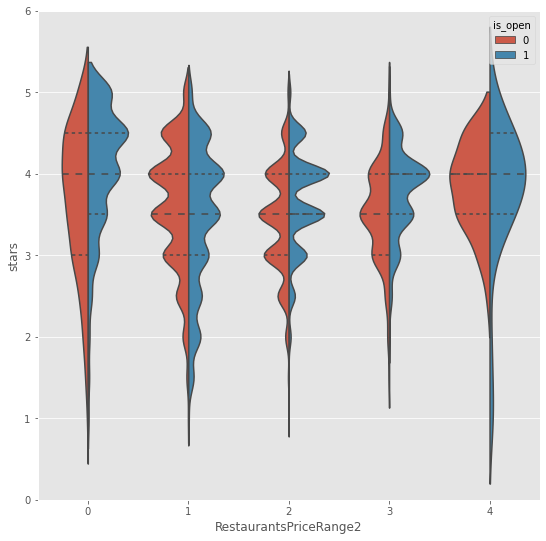

In [78]:
f, ax = plt.subplots(figsize=(9, 9))
sns.violinplot(x='RestaurantsPriceRange2',y='stars',hue='is_open',
               data= restaurants,split=True,inner="quart")
plt.ylim(0,6)
restaurants.groupby('RestaurantsPriceRange2').describe()